In [6]:
import darshan
darshan.enable_experimental(verbose=False)

import pprint

from darshan.experimental.plots.matplotlib import plot_access_histogram
from darshan.experimental.plots.matplotlib import plot_opcounts

### Report Algebra

Reports come with a number of operations which can be applied to them. For a number of common combinations a shorthand notations can be used, which exploits operator overloading. This can be useful in a variety of contexts such as analysis, as well as performance projection and extrapolation.

    Operation                        Returns Interpreation
    ---------                        ------- -------------
    report + report              =>  report: merge reports - equivalant to .merge()
    report + datetime.timedelta  =>  report: all report records are moved in time

    report * scalar              =>  report: all report records are dublicated 'scalar' times
                                             integer multiplication is well defined
                                             float multiplication is only defined after reduction

More operations are discussed at the end of the notebook.

#### Example:

In [7]:
import darshan
import copy

darshan.enable_experimental(verbose=False)

In [8]:
r1 = darshan.DarshanReport("sample.darshan", read_all=True)
r2 = darshan.DarshanReport("noposix.darshan", read_all=True)
r3 = darshan.DarshanReport("sample-badost.darshan", read_all=True)

In [9]:
# display some infor about each report for comparison
for r in [r1, r2, r3]:
    r.info(metadata=False)
    print()

Filename:       sample.darshan
Times:          2017-03-20 10:07:47 to 2017-03-20 10:09:43 (Duration 0:01:56)
Executeable:    /global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32
Processes:      2048
JobID:          4478544
UID:            69615
Modules in Log: ['POSIX', 'MPI-IO', 'LUSTRE', 'STDIO']
Loaded Records: {'POSIX': 1, 'MPI-IO': 1, 'STDIO': 129}
Name Records:   4
Darshan/Hints:  {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(140706993325840) (tmp)

Filename:       noposix.darshan
Times:          2018-01-02 20:57:35 to 2018-01-03 07:51:07 (Duration 10:53:32)
Executeable:    160345792
Processes:      512
JobID:          83017637
UID:            996599276
Modules in Log: ['LUSTRE', 'STDIO']
Loaded Records: {'STDIO': 2}
Name Records:   522
Darshan/Hints:  {'lib_ver': '3.1.4', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(140706993325784) (

In [10]:
# merge to reports
c = r1 + r2          # alternatives:  r1.merge(r2)  or  darshan.merge(r1, r2)   ?
c.info()

Filename:       None
Times:          2017-03-20 10:07:47 to 2018-01-03 07:51:07 (Duration 288 days, 21:43:20)
Loaded Records: {'POSIX': 1, 'MPI-IO': 1, 'STDIO': 131}
Name Records:   523
DarshanReport:  id(140707858703864) (tmp)


In [ ]:
# A closer look at the name records 
for r in [r1, r2, r3]:
    r.read_all()
    for key, val in r.name_records_summary().items():
        print(val)
    print()

In [ ]:
r3.data['name_records']

In [ ]:
counts = {}

for mod, records in r1.records.items():
    for rec in records:
        if rec['id'] not in counts:
            counts[rec['id']] = {}
            
        ctx = counts[rec['id']]
        if mod not in ctx:
            ctx[mod] = 1
        else:
            ctx[mod] += 1
            
counts

Summarizing... agg_ioops
Read,Write,Open,Stat,Seek,Mmap,Fsync,Layer
0,16402,2049,0,16404,0,0,POSIX
0,18,0,0,0,0,0,MPIIND
0,16384,2048,0,0,0,0,MPICOL
0,74,129,0,0,0,0,STDIO



<module 'matplotlib.pyplot' from '/home/pq/ANL/darshan-decaf/testbed/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

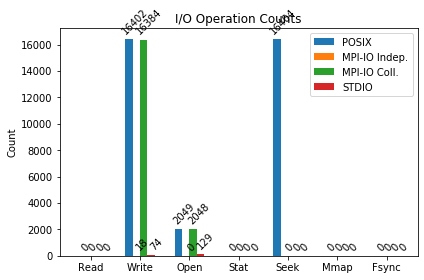

In [22]:
plot_opcounts(r1)

[('POSIX', 2048), ('STDIO', 3)]
Summarizing... iohist POSIX


<module 'matplotlib.pyplot' from '/home/pq/ANL/darshan-decaf/testbed/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

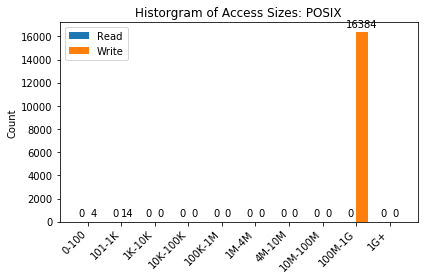

In [23]:
r3.mod_read_all_records("POSIX")
print([(key, len(val)) for key, val in r3.records.items()])
plot_access_histogram(c, 'POSIX')

[('STDIO', 2)]
Summarizing... agg_ioops
Read,Write,Open,Stat,Seek,Mmap,Fsync,Layer
0,0,0,0,0,0,0,POSIX
0,0,0,0,0,0,0,MPIIND
0,0,0,0,0,0,0,MPICOL
199687,2190437,1024,0,203265,0,217126,STDIO



<module 'matplotlib.pyplot' from '/home/pq/ANL/darshan-decaf/testbed/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

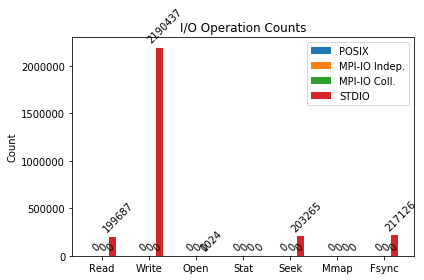

In [24]:
r2.mod_read_all_records("STDIO")
print([(key, len(val)) for key, val in r2.records.items()])
#plot_access_histogram(c, 'POSIX')
plot_opcounts(r2)

[('POSIX', 2048), ('STDIO', 3)]
Summarizing... iohist MPI-IO


<module 'matplotlib.pyplot' from '/home/pq/ANL/darshan-decaf/testbed/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

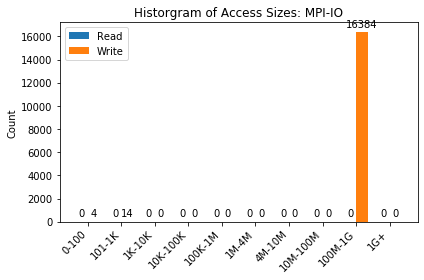

In [25]:
r1.mod_read_all_records("MPI-IO")
print([(key, len(val)) for key, val in r3.records.items()])
plot_access_histogram(c, 'MPI-IO')

[('POSIX', 4097), ('MPI-IO', 1), ('STDIO', 135)]
Summarizing... agg_ioops
Read,Write,Open,Stat,Seek,Mmap,Fsync,Layer
0,278546,6145,4096,278548,0,4096,POSIX
0,18,0,0,0,0,0,MPIIND
0,16384,2048,0,0,0,0,MPICOL
69632,268,12417,0,0,0,4112,STDIO



<module 'matplotlib.pyplot' from '/home/pq/ANL/darshan-decaf/testbed/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

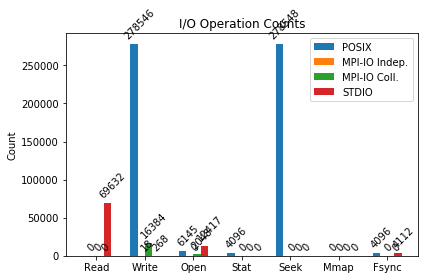

In [40]:
c = r2 + r2  # inflate stdio
c = r1 + r3 + r3

print([(key, len(val)) for key, val in c.records.items()])
#plot_access_histogram(c, 'POSIX')
plot_opcounts(c)

In [ ]:
combined = r1 + r2
[(key, len(val)) for key, val in combined.records.items()]

## Aggregations and Summaries

In [ ]:
import darshan
darshan.enable_experimental()

r3 = darshan.DarshanReport("example.darshan")
r3.mod_read_all_records('POSIX')
r3.mod_read_all_records('MPI-IO')


from darshan.experimental.plots.matplotlib import plot_access_histogram
plot_access_histogram(r3, mod='POSIX')

In [ ]:
r3.mod_agg_iohist('POSIX')

In [ ]:
r3.data

In [ ]:
darshan.enable_experimental()
dir(r3)

## Internal Identity Checks

In [ ]:
# check if copy.copy is sufficient (ok on this level.. but!)
id(r1.records['POSIX']) == id(combined.records['POSIX'])

In [ ]:
# check if copy.copy is sufficient (potential conflict for this level?)
# The question has to be, if we assume people to modify a log record
# I'd tend to say no, and document that with a warning somewhere
id(r1.records['POSIX'][0]) == id(combined.records['POSIX'][0])

## Provenance

The report object maintains a provenance log to investigate and trace aggregations (recording can be disabled by changing `record_provenance` to `False`). Two indexes are maintained:

* A list of all included sub-reports which hold records in the current report
* A list of all alterings/filterings performed on the current report with timestamps/revision

In [ ]:
c.provenance_log

## Notes on Additional Operations

This section collections other possible intepretations to common operations / input pairs.

    Operation                        Returns Interpreation
    ---------                        ------- -------------
    report + report              =>  report: merge reports - equivalant to .merge()
    report + datetime.timedelta  =>  report: all report records are moved in time

    report * scalar              =>  report: all report records are dublicated 'scalar' times
                                             integer multiplication is well defined
                                             float multiplication is only defined after reduction    
    report - report              =>  report: remove matching records from left report

    # Considered, but likely only implemented as a special function
    report / report              =>  dict?:  various factors of whether the right reports can be part of left
                                             for example, how often into duration, how often per layer
                                             right report likely, has to use patterns to be useful
    report * datetime.timedelta  =>  report: skew I/O activity timeline (start/end, dxt traces)
    
    # Undefined (most typical operators just don't offer a meaningful interpretation)
    report * report
    
    arithmetic:
    + addition
    - substraction
    * multiplication
    / devision
    % modulus
    ** exponent
    // floor devision
    
    comparison:
    == equals
    != not equal
    >
    <
    >=
    <=
    
    bitwise:
    & and
    | or
    ^ xor
    ~ flip bits (operator is unary)
    << left shift
    >> right shift
    
    logical:
    and
    or
    not
    
    membership:
    in
    not in
    
    identity:
    is
    is not
    
    